In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score,f1_score
x=pd.read_csv("sample.csv")
df=pd.DataFrame(x)
display(df)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())

0

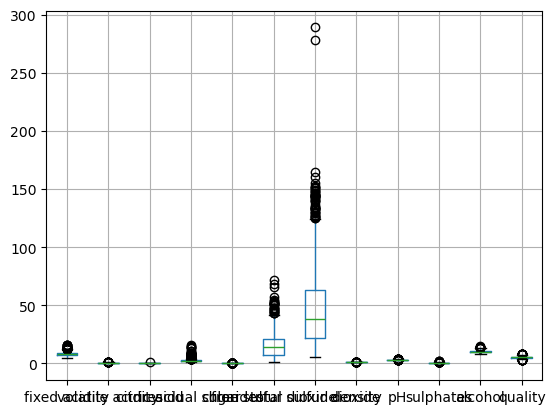

In [6]:
df.boxplot()
plt.show()

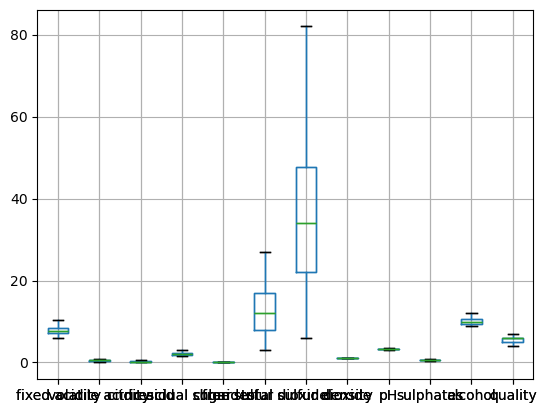

In [8]:
def find_out(z):
    q1 = z.quantile(0.35)
    q3 = z.quantile(0.65)
    iqr = q3 - q1
    out = z[(z >= (q1 - 1.5 * iqr)) & (z <= (q3 + 1.5 * iqr))]
    return out
l=pd.read_csv("sample.csv")
df=pd.DataFrame(l)
df=df.apply(find_out)
df.dropna(inplace=True)
df.boxplot()
plt.show()

In [9]:
df.groupby('quality').mean()
x=df.drop(columns='quality',axis=1)


In [10]:
y=df['quality']
y

0       5.0
2       5.0
4       5.0
5       5.0
6       5.0
       ... 
1567    5.0
1568    5.0
1575    6.0
1580    6.0
1584    7.0
Name: quality, Length: 438, dtype: float64

In [11]:

scaler=StandardScaler()
standard_data=scaler.fit_transform(x)
standard_data

array([[-0.51537486,  1.20292586, -1.31388181, ...,  1.92340274,
        -0.5124555 , -0.87009971],
       [-0.09715496,  1.6428186 , -1.05330665, ..., -0.74359232,
         0.57831101, -0.33267165],
       [-0.51537486,  1.20292586, -1.31388181, ...,  1.92340274,
        -0.5124555 , -0.87009971],
       ...,
       [-0.41081988, -0.11675235,  1.29186975, ..., -0.74359232,
         0.45711473,  2.35446865],
       [-0.51537486, -1.36311511,  0.83586323, ...,  0.3232057 ,
        -0.02767038,  2.48882567],
       [-1.24725967, -1.58306148,  1.55244491, ..., -0.42355291,
         2.3962552 ,  2.08575462]])

In [13]:
X=standard_data
Y=df['quality']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [15]:
display(x_train.shape)
display(x_test.shape)


(350, 11)

(88, 11)

In [16]:
def Tr_and_eval(classifier, x_train, y_train, x_test, y_test):
   
    classifier.fit(x_train, y_train)
    train_pred = classifier.predict(x_train)
    test_pred = classifier.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracy1=f1_score(y_train,train_pred,average='weighted')
    test_accuracy1=f1_score(y_test,test_pred,average='weighted')

    print(f"{classifier} -  \nTraining Accuracya_score: {train_accuracy*100:}")
    print("Testing Accuracy:"  f"{test_accuracy*100:}")
    print("\n")
    print(f"Training f1_score: {train_accuracy1*100:}")
    print("Testing  f1_score:"  f"{test_accuracy1*100:}")
    print("\n")

classifier1 = svm.SVC(kernel='linear')
Tr_and_eval(classifier1, x_train, y_train, x_test, y_test)

classifier2 = RandomForestClassifier(n_estimators=100, random_state=55)
Tr_and_eval(classifier2, x_train, y_train, x_test, y_test)

classifier3 = DecisionTreeClassifier(random_state=42)
Tr_and_eval(classifier3, x_train, y_train, x_test, y_test)

classifier4 = KNeighborsClassifier(n_neighbors=5)

Tr_and_eval(classifier4, x_train, y_train, x_test, y_test)

classifier5 = GaussianNB()
Tr_and_eval(classifier5, x_train, y_train, x_test, y_test)


SVC(kernel='linear') -  
Training Accuracya_score: 63.714285714285715
Testing Accuracy:64.77272727272727


Training f1_score: 60.791389167131825
Testing  f1_score:61.772650100324135


RandomForestClassifier(random_state=55) -  
Training Accuracya_score: 100.0
Testing Accuracy:75.0


Training f1_score: 100.0
Testing  f1_score:72.81048028174465


DecisionTreeClassifier(random_state=42) -  
Training Accuracya_score: 100.0
Testing Accuracy:65.9090909090909


Training f1_score: 100.0
Testing  f1_score:66.16556431184915


KNeighborsClassifier() -  
Training Accuracya_score: 68.0
Testing Accuracy:62.5


Training f1_score: 65.64588802797758
Testing  f1_score:61.643381023225984


GaussianNB() -  
Training Accuracya_score: 61.142857142857146
Testing Accuracy:60.22727272727273


Training f1_score: 59.7509017985379
Testing  f1_score:59.07097952552497




In [13]:

data = {
    'train-accuracy_score': [63.714285714285715,100.0,100.0,68.0,61.142857142857146],
    'test-accuracy_score': [64.77272727272727, 75.0,65.9090909090909,62.5,60.22727272727273],
    'train-f1_score': [60.791389167131825,100.0,100.0,65.64588802797758,59.7509017985379],
    'test-f1_score': [61.772650100324135,72.81048028174465,66.16556431184915,61.643381023225984,59.07097952552497],
    
}
index=['svm','Random forest','Decision Tree','K_neartest ','GaussianNB']
df = pd.DataFrame(data,index=index)
display(df)

train-accuracy_score  test-accuracy_score  train-f1_score  \
svm                       63.714286            64.772727       60.791389   
Random forest            100.000000            75.000000      100.000000   
Decision Tree            100.000000            65.909091      100.000000   
K_neartest                68.000000            62.500000       65.645888   
GaussianNB                61.142857            60.227273       59.750902   

               test-f1_score  
svm                61.772650  
Random forest      72.810480  
Decision Tree      66.165564  
K_neartest         61.643381  
GaussianNB         59.070980

DATA VISUALIZATION 

C:\Users\91901\AppData\Local\Temp\ipykernel_22404\3502734884.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["quality"],bins=10)


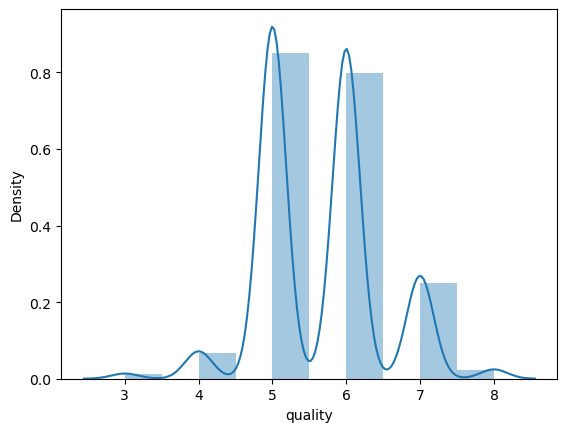

In [18]:
import seaborn as sns

sns.distplot(df["quality"],bins=10)
plt.show()


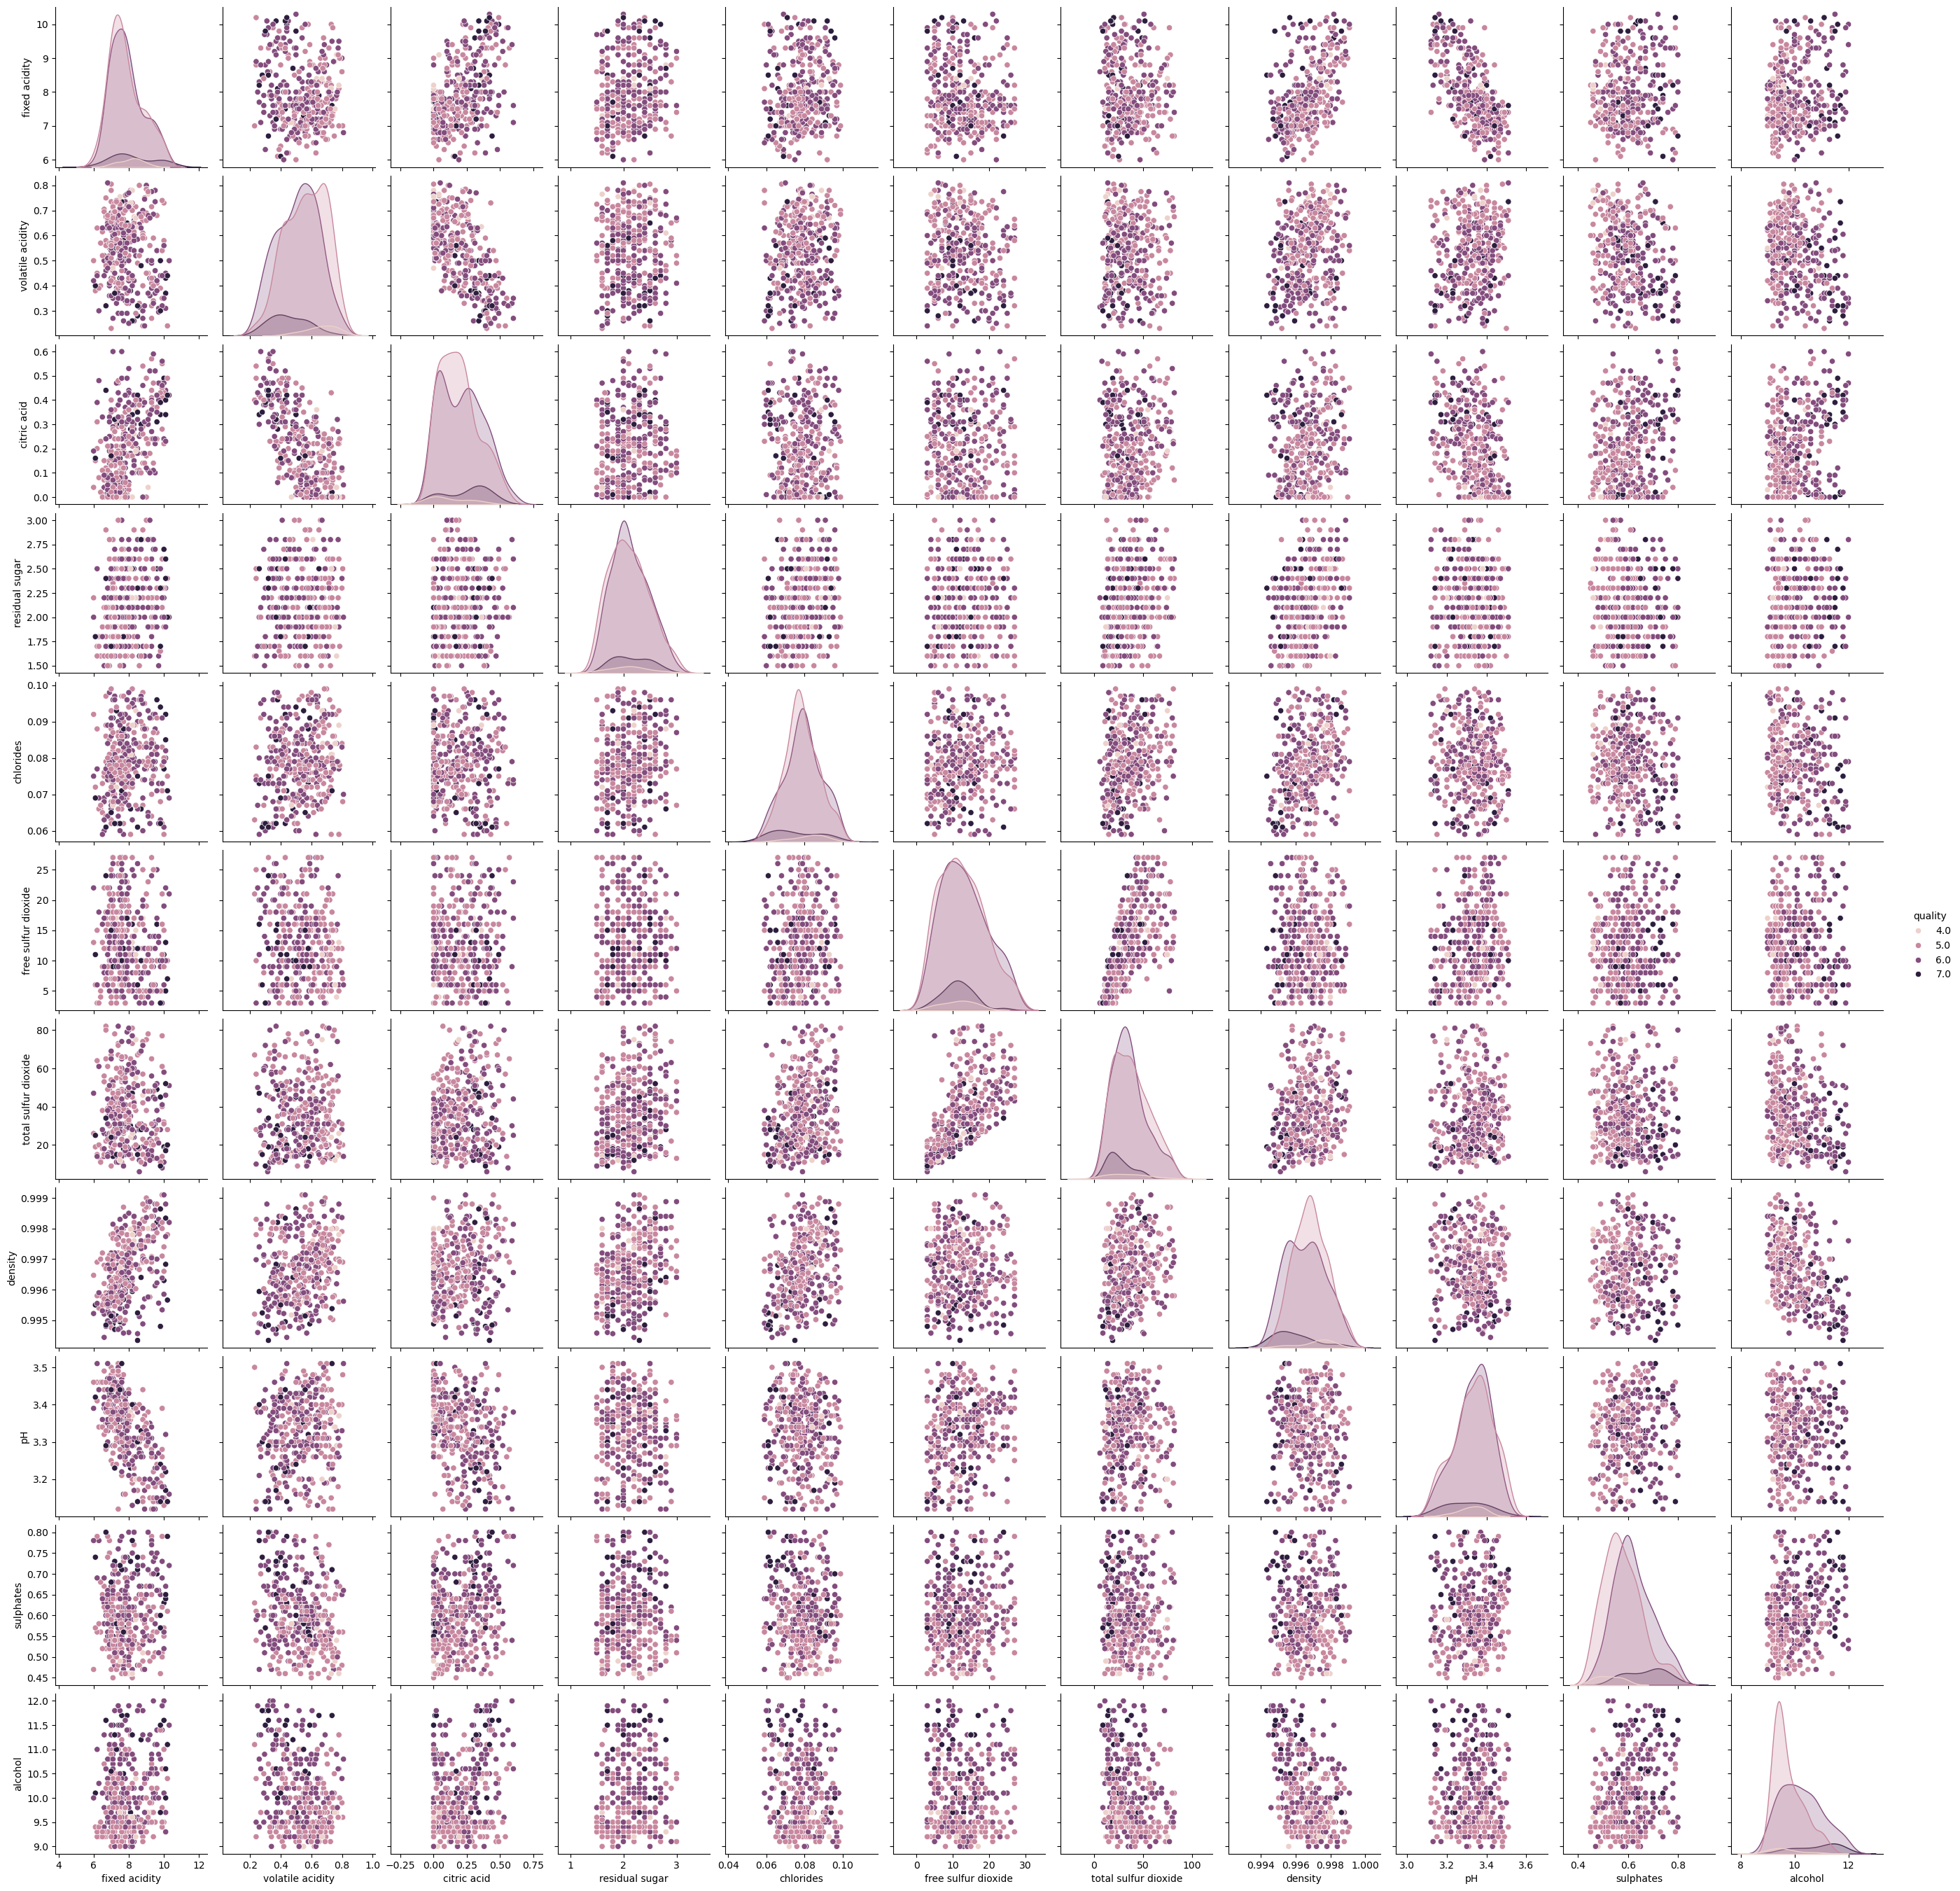

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="quality", diag_kind="kde")
plt.show()

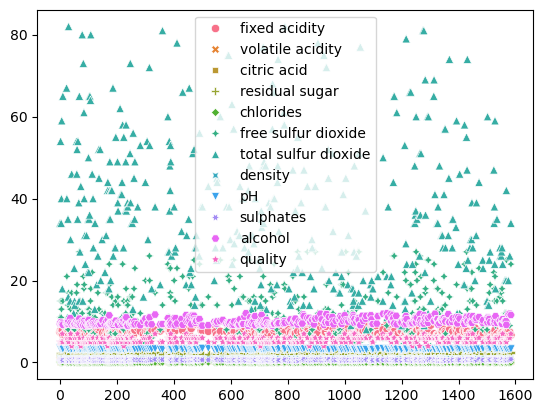

In [ ]:

sns.scatterplot(data=df)

plt.show()


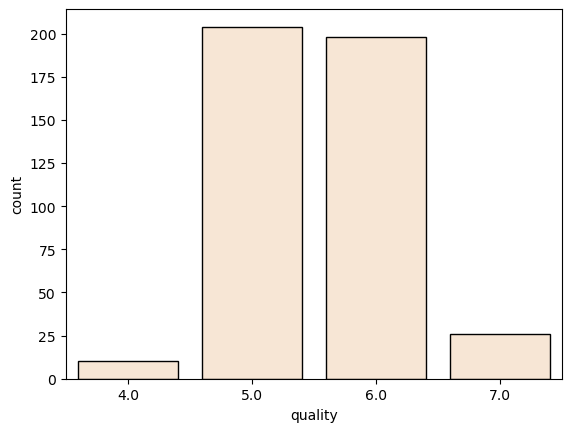

In [ ]:
sns.countplot(x=df['quality'],facecolor='#f7e6d5',edgecolor='black')
plt.show()

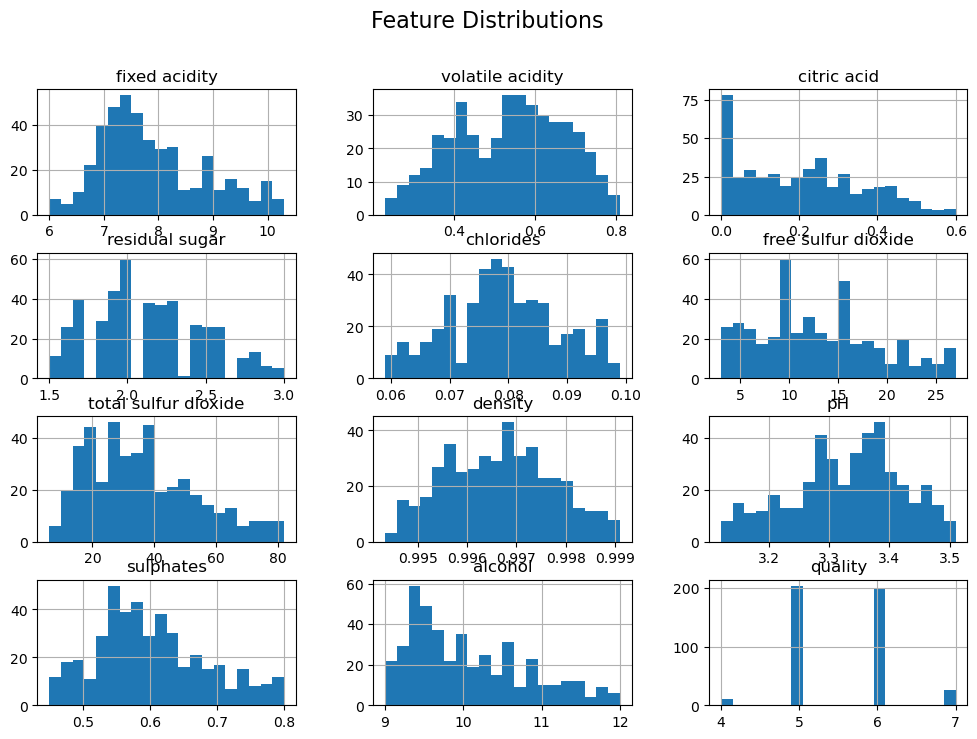

In [ ]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

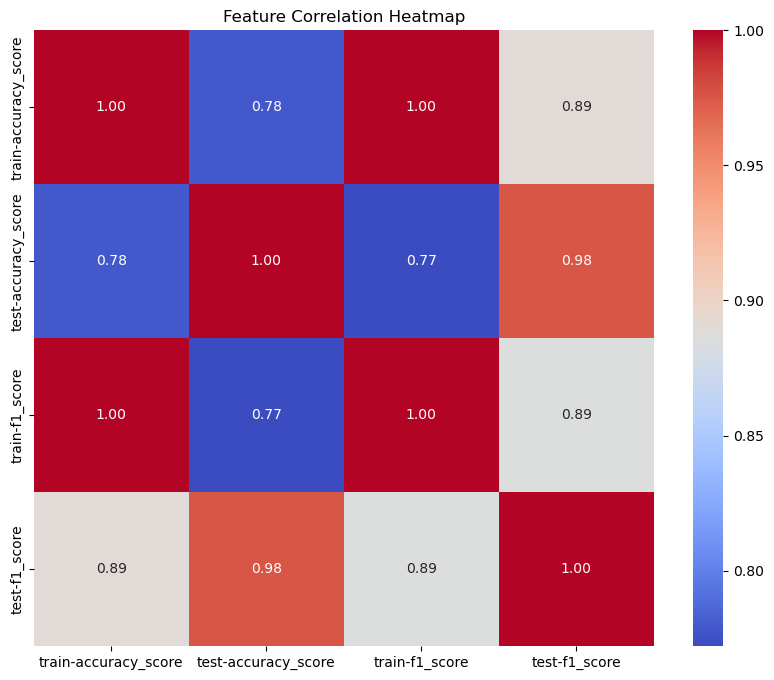

In [18]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
import pickle
pickle.dump( classifier1, open('wine_mod.pkl', 'wb'))
mod = pickle.load(open('wine_mod.pkl', 'rb'))
